In [ ]:
#Environment Setup & Library import

#Find this Code:
#https://www.kaggle.com/sohelranaccselab/mechanisms-of-action-moa-prediction-using-ann/output?scriptVersionId=42060759


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
import random
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
def seed_everything(seed=2020):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
seed_everything(42)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lish-moa/test_features.csv
/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/train_targets_scored.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv
/kaggle/input/lish-moa/sample_submission.csv


In [4]:
#Data Read, Data Visualization,EDA Analysis,Data Pre-Processing,Data Splitting

In [5]:
#Data Read
file_path = '../input/lish-moa'
train_features =pd.read_csv(f'{file_path}/train_features.csv')
train_targets =pd.read_csv(f'{file_path}/train_targets_scored.csv')

In [6]:
train_features

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,trt_cp,24,D2,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,trt_cp,24,D2,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,ctl_vehicle,48,D2,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,trt_cp,24,D1,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [7]:
train_targets

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
COLS = ['cp_type','cp_dose']
FE = []
for col in COLS:
    for mod in train_features[col].unique():
        FE.append(mod)
        train_features[mod] = (train_features[col] == mod).astype(int)
del train_features['sig_id']
del train_features['cp_type']
del train_features['cp_dose']
FE+=list(train_features.columns) 
del train_targets['sig_id']

In [9]:
df=train_features.copy()

In [10]:
df = df.loc[:,~df.columns.duplicated()]

In [11]:
df.shape

(23814, 877)

In [12]:
df.apply(lambda x: sum(x.isnull()),axis=0)

cp_time        0
g-0            0
g-1            0
g-2            0
g-3            0
              ..
c-99           0
trt_cp         0
ctl_vehicle    0
D1             0
D2             0
Length: 877, dtype: int64

In [13]:
df.corr()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-94,c-95,c-96,c-97,c-98,c-99,trt_cp,ctl_vehicle,D1,D2
cp_time,1.000000,0.007610,0.043335,-0.162238,-0.031226,0.027241,-0.081324,-0.030058,0.003499,-0.024291,...,-0.064898,-0.112583,-0.067116,-0.067969,-0.088916,-0.075736,-0.000857,0.000857,0.001122,-0.001122
g-0,0.007610,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,...,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238,0.072139,-0.072139,0.046947,-0.046947
g-1,0.043335,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,...,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308,0.066868,-0.066868,-0.101326,0.101326
g-2,-0.162238,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,...,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124,0.053437,-0.053437,0.097255,-0.097255
g-3,-0.031226,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,...,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579,-0.002551,0.002551,-0.020745,0.020745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c-99,-0.075736,-0.609238,-0.002308,-0.172124,-0.037579,-0.390581,0.192385,-0.079813,0.489600,0.568512,...,0.827228,0.758110,0.789649,0.775300,0.755991,1.000000,-0.117060,0.117060,-0.026250,0.026250
trt_cp,-0.000857,0.072139,0.066868,0.053437,-0.002551,0.091805,-0.013221,-0.092641,-0.005120,-0.097569,...,-0.104947,-0.098305,-0.087668,-0.092418,-0.120323,-0.117060,1.000000,-1.000000,0.000252,-0.000252
ctl_vehicle,0.000857,-0.072139,-0.066868,-0.053437,0.002551,-0.091805,0.013221,0.092641,0.005120,0.097569,...,0.104947,0.098305,0.087668,0.092418,0.120323,0.117060,-1.000000,1.000000,-0.000252,0.000252
D1,0.001122,0.046947,-0.101326,0.097255,-0.020745,0.050323,0.141974,0.046977,-0.031199,-0.021346,...,-0.028690,-0.025122,-0.026105,-0.024246,-0.031905,-0.026250,0.000252,-0.000252,1.000000,-1.000000


In [14]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [15]:
pd.crosstab(df.trt_cp, df.ctl_vehicle, margins=True).style.background_gradient(cmap='autumn_r')

ctl_vehicle,0,1,All
trt_cp,,,
0,0,1866,1866
1,21948,0,21948
All,21948,1866,23814


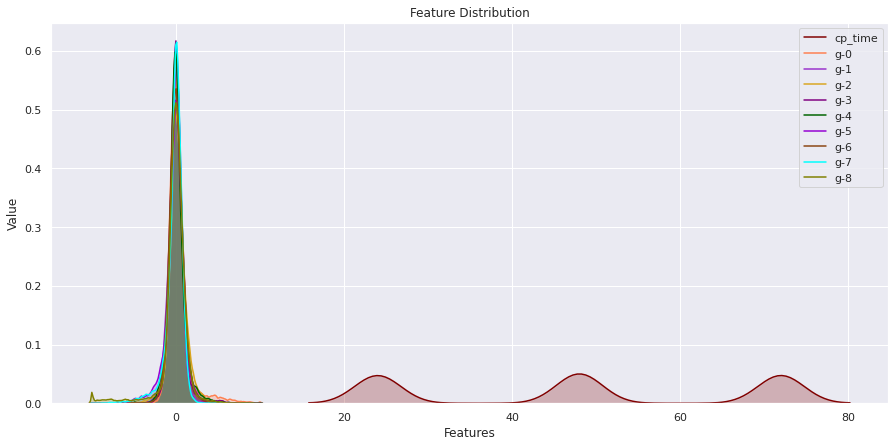

In [16]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

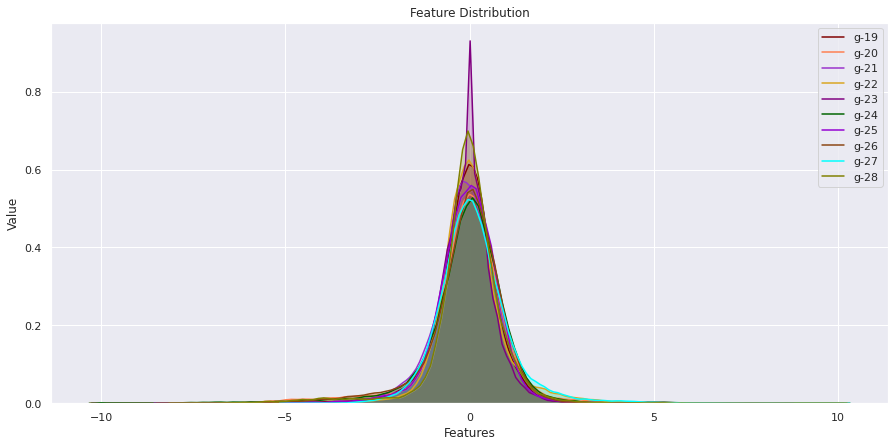

In [17]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[20:30]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)


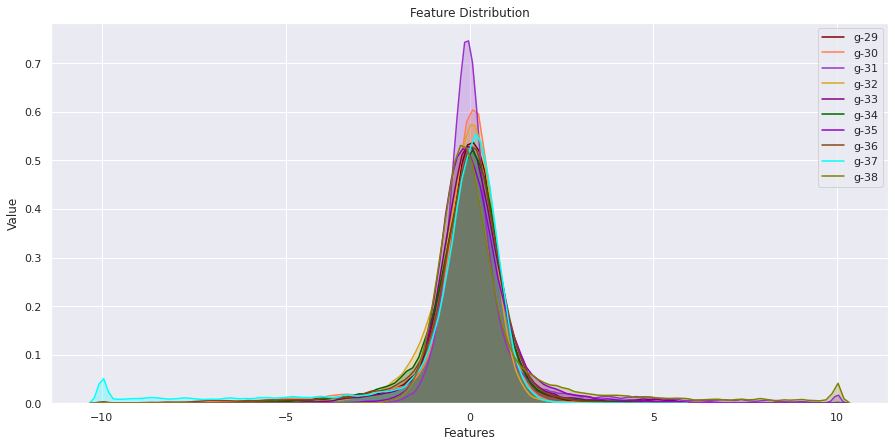

In [18]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[30:40]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

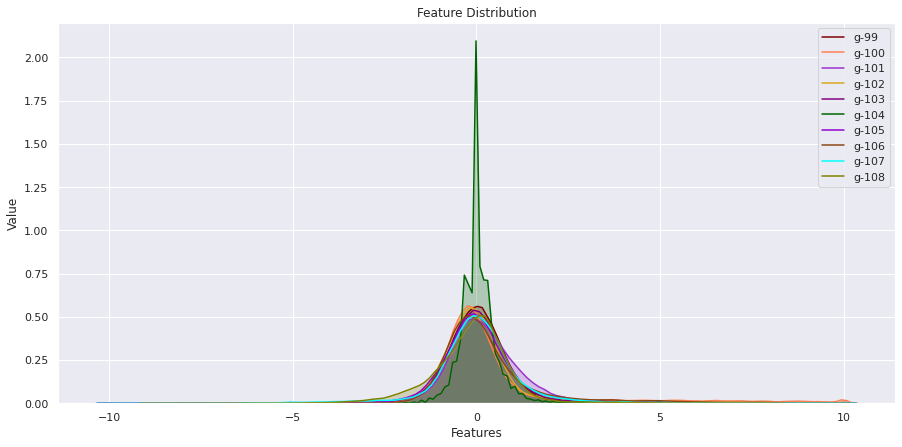

In [19]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[100:110]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

In [21]:
train_features=df.copy()

In [23]:
test_features = pd.read_csv('../input/lish-moa/test_features.csv')
for col in COLS:
    for mod in test_features[col].unique():
        test_features[mod] = (test_features[col] == mod).astype(int)
sig_id = pd.DataFrame()
sig_id = test_features.pop('sig_id')
del test_features['cp_type']
del test_features['cp_dose']


In [24]:
test_features

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-94,c-95,c-96,c-97,c-98,c-99,trt_cp,ctl_vehicle,D1,D2
0,24,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,-0.2140,0.2221,-0.3260,...,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750,1,0,1,0
1,72,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,-1.8820,0.4022,-0.3528,...,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300,1,0,1,0
2,24,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,-0.3390,-0.3206,0.6944,...,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942,0,1,1,0
3,24,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,0.5998,-0.1799,0.9365,...,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809,1,0,0,1
4,48,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,0.5128,0.6365,0.2611,...,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,24,0.4571,-0.5743,3.3930,-0.6202,0.8557,1.6240,0.0640,-0.6316,-1.1990,...,-0.6539,-0.4791,-1.2680,-1.1280,-0.4167,-0.6600,1,0,1,0
3978,24,-0.5885,-0.2548,2.5850,0.3456,0.4401,0.3107,-0.7437,-0.0143,0.2615,...,0.9312,1.2730,0.2614,-0.2790,-0.0131,-0.0934,1,0,1,0
3979,72,-0.3985,-0.1554,0.2677,-0.6813,0.0152,0.4791,-0.0166,0.7501,0.0346,...,0.9568,0.4666,0.0461,0.5888,-0.4205,-0.1504,1,0,1,0
3980,48,-1.0960,-1.7750,-0.3977,1.0160,-1.3350,-0.2207,-0.3611,-1.3020,1.0150,...,0.3133,0.1286,-0.2618,0.5074,0.7430,-0.0484,1,0,0,1


In [25]:
pe = np.zeros((test_features.shape[0], 206))

In [30]:
pe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
train_features = train_features.values
train_targets = train_targets.values
pred = np.zeros((train_features.shape[0], 206))

In [28]:
train_features

array([[24.    ,  1.062 ,  0.5577, ...,  0.    ,  1.    ,  0.    ],
       [72.    ,  0.0743,  0.4087, ...,  0.    ,  1.    ,  0.    ],
       [48.    ,  0.628 ,  0.5817, ...,  0.    ,  1.    ,  0.    ],
       ...,
       [48.    ,  0.3942,  0.3756, ...,  1.    ,  0.    ,  1.    ],
       [24.    ,  0.666 ,  0.2324, ...,  0.    ,  1.    ,  0.    ],
       [72.    , -0.8598,  1.024 , ...,  0.    ,  1.    ,  0.    ]])

In [29]:
train_targets

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Define Artificial neural Networks(ANNs)

In [31]:
def model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(877),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(2048, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(206, activation="softmax")
        ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.03), loss='categorical_crossentropy', metrics=["accuracy", "AUC"])
    return model

In [32]:
model()

In [38]:
from sklearn.model_selection import KFold
NFOLD = 5
kf = KFold(n_splits=NFOLD)

BATCH_SIZE=64
EPOCHS=50

In [39]:
from sklearn.model_selection import  train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [40]:

cnt=0
for tr_idx, val_idx in kf.split(train_features):
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, epsilon=1e-4, mode='max')
    cnt += 1
    print(f"FOLD {cnt}")
    net = model()
    net.fit(train_features[tr_idx], train_targets[tr_idx], batch_size=BATCH_SIZE, epochs=EPOCHS, 
            validation_data=(train_features[val_idx], train_targets[val_idx]), verbose=0, callbacks=[reduce_lr_loss])
    print("train", net.evaluate(train_features[tr_idx], train_targets[tr_idx], verbose=0, batch_size=BATCH_SIZE))
    print("val", net.evaluate(train_features[val_idx], train_targets[val_idx], verbose=0, batch_size=BATCH_SIZE))
    print("predict val...")
    pred[val_idx] = net.predict(train_features[val_idx], batch_size=BATCH_SIZE, verbose=0)
    print("predict test...")
    pe += net.predict(test_features, batch_size=BATCH_SIZE, verbose=0) / NFOLD

FOLD 1

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.002999999932944775.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.00030000000260770325.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 3.000000142492354e-05.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 3.000000106112566e-06.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 3.000000106112566e-07.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 3.000000106112566e-08.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 3.000000248221113e-09.

Epoch 00035: ReduceLROnPlateau reducing learning rate to 3.000000248221113e-10.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 3.000000248221113e-11.

Epoch 00041: ReduceLROnPlateau reducing learning rate to 3.0000002482211132e-12.

Epoch 00044: ReduceLROnPlateau reducing learning rate to 3.0000002048530264e-13.

Epoch 00047: ReduceLROnPlateau reducing learning rate to 3.0000001506429173e-14.

Epoch 00050: Redu

In [41]:
pe.shape


(3982, 206)

In [42]:
columns = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
del columns['sig_id']


In [43]:
sub = pd.DataFrame(data=pe, columns=columns.columns)

In [44]:
sample = pd.read_csv('../input/lish-moa/sample_submission.csv')
sub.insert(0, column = 'sig_id', value=sample['sig_id'])

In [45]:
sub.to_csv('submission.csv', index=False)

In [46]:
# Make sure all the columns between our submission and the sample submission are the same
def Diff(list1, list2): 
    return (list(list(set(list1)-set(list2)) + list(set(list2)-set(list1)))) 

Diff (sub.columns, pd.read_csv('../input/lish-moa/sample_submission.csv').columns)

[]